# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
#Check that the connection is working
api_key = weather_api_key
city_name = "London"
test_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'
t_response = requests.get(test_url)
if t_response.status_code ==200:
    print("API key is working")
    print(t_response.json())
else:
    print(f"Error: {t_response.status_code}")

API key is working
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 284.96, 'feels_like': 284.31, 'temp_min': 283.87, 'temp_max': 286.03, 'pressure': 1002, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1699925001, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1699946170, 'sunset': 1699978426}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_response = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']['lat']
        city_lng = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_clouds = city_response['clouds']['all']
        city_wind = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_date = city_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print(city_weather)
              
#ndicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bamboo flat
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | yuzhno-kurilsk
Processing Record 5 of Set 1 | usogorsk
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | caiaponia
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | greenville
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | furth
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | zeya
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | curup
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bamboo flat,11.7000,92.7167,300.20,89,100,1.03,IN,1699925593
1,yellowknife,62.4560,-114.3525,267.44,86,100,3.09,CA,1699925593
2,port-aux-francais,-49.3500,70.2167,279.86,97,100,15.92,TF,1699925594
3,yuzhno-kurilsk,44.0306,145.8556,275.58,80,77,10.27,RU,1699925077
4,usogorsk,63.4106,48.6872,272.41,94,100,3.27,RU,1699925036


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
# what Is the point of reading it from the csv we just made. 
# Is it to add index_col
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Small function to change max temp from kelvin to fahrenheit
def k_to_f(kelvin):
    return (kelvin - 273.15) * (9/5) + 32
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(k_to_f)
# Max temp is now in Fahrenheit
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bamboo flat,11.7000,92.7167,80.690,89,100,1.03,IN,1699925593
1,yellowknife,62.4560,-114.3525,21.722,86,100,3.09,CA,1699925593
2,port-aux-francais,-49.3500,70.2167,44.078,97,100,15.92,TF,1699925594
3,yuzhno-kurilsk,44.0306,145.8556,36.374,80,77,10.27,RU,1699925077
4,usogorsk,63.4106,48.6872,30.668,94,100,3.27,RU,1699925036


In [9]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

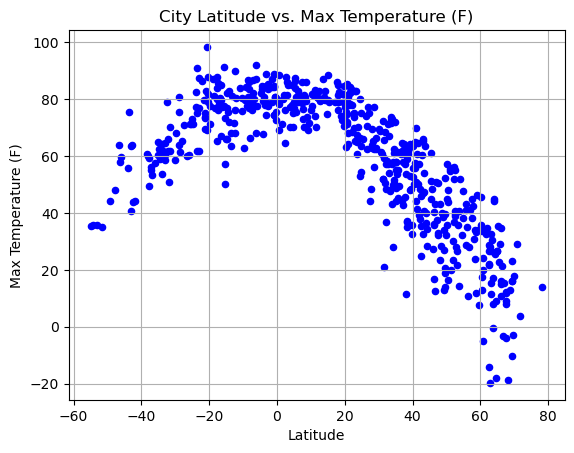

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Max Temp", color = 'blue', marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F)")
# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

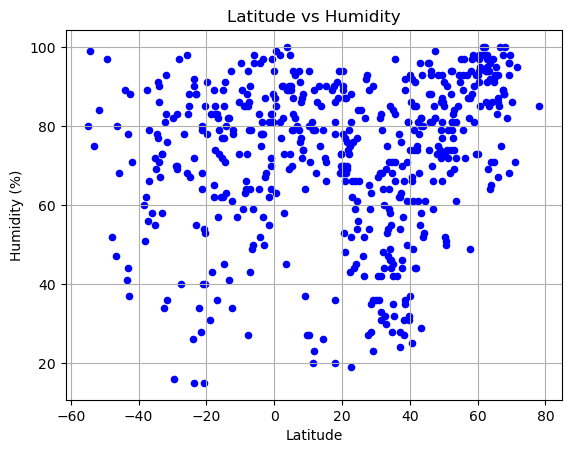

In [15]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y="Humidity", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

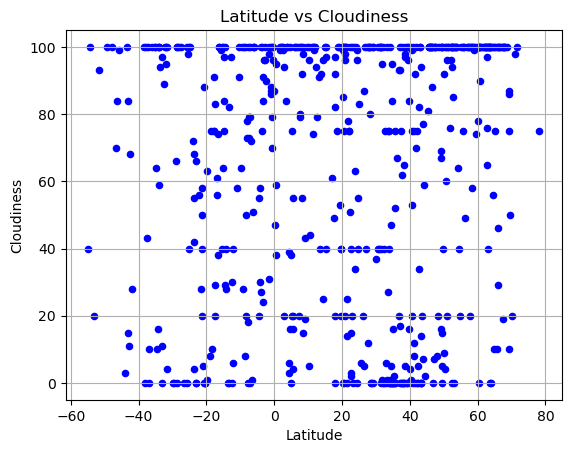

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x = "Lat", y="Cloudiness", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

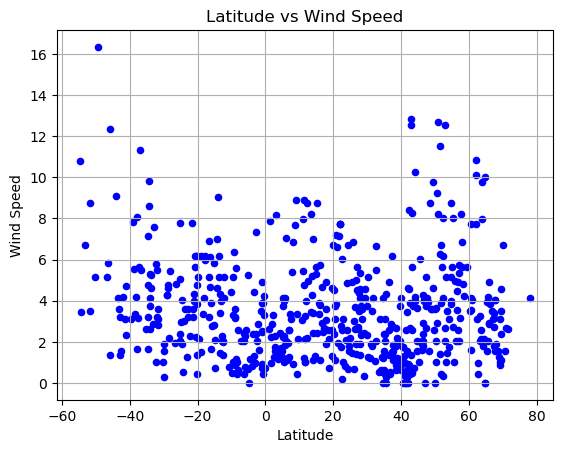

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x = "Lat", y="Wind Speed", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + "x + " str(round(intercept, 2))

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_data = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bamboo flat,11.7000,92.7167,80.690,89,100,1.03,IN,1699925593
1,yellowknife,62.4560,-114.3525,21.722,86,100,3.09,CA,1699925593
3,yuzhno-kurilsk,44.0306,145.8556,36.374,80,77,10.27,RU,1699925077
4,usogorsk,63.4106,48.6872,30.668,94,100,3.27,RU,1699925036
9,greenville,35.6127,-77.3663,45.122,97,0,0.00,US,1699925025


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,44.078,97,100,15.92,TF,1699925594
5,puerto natales,-51.7236,-72.4875,35.132,84,93,5.03,CL,1699925555
6,adamstown,-25.0660,-130.1015,73.004,85,100,7.80,PN,1699925595
7,caiaponia,-16.9567,-51.8103,78.332,36,56,0.99,BR,1699925596
8,rio grande,-32.0350,-52.0986,65.948,93,100,4.09,BR,1699925518


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8727994032294477


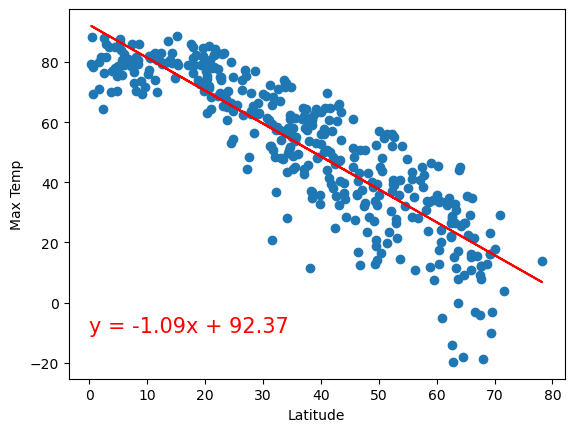

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_data["Lat"]
y = northern_hemi_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.7491759914061255


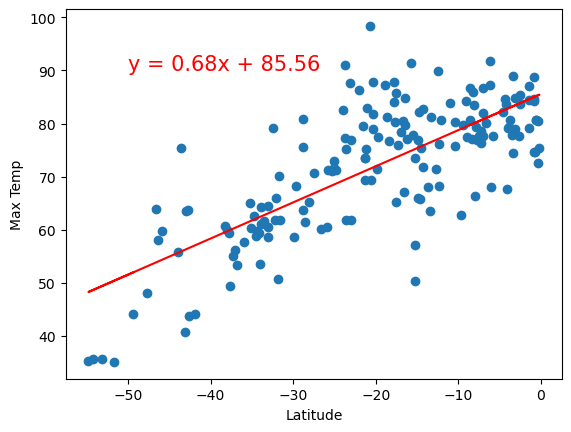

In [41]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:**
-In the northern hemisphere relationship there is a negative correlation between latitude and the max temperature of a city. This makes sense because as the latitude increases the cities are becoming further and further away from the equator which is causing the max temperature to decrease. 
-In the southern hemisphere relationship there is a positive correlation between latitude and max temperature. This is because as the latitude moves towards 0, the cities are moving closer and closer to the equator. The max temp is lowest in the cities with the smallest latitude, and as latitude increases we can clearly see max temperature increasing.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23532346556073602


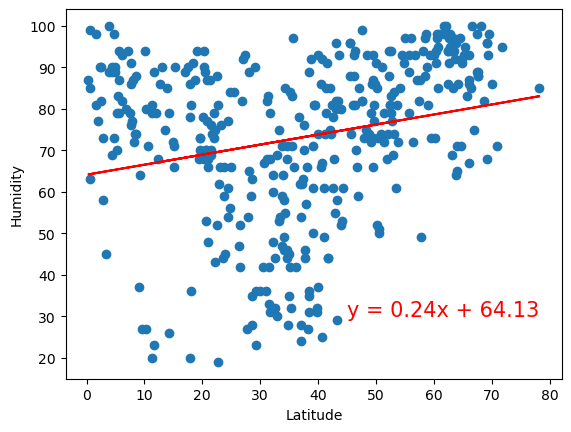

In [42]:
# Northern Hemisphere
x = northern_hemi_data["Lat"]
y = northern_hemi_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.08434841908678158


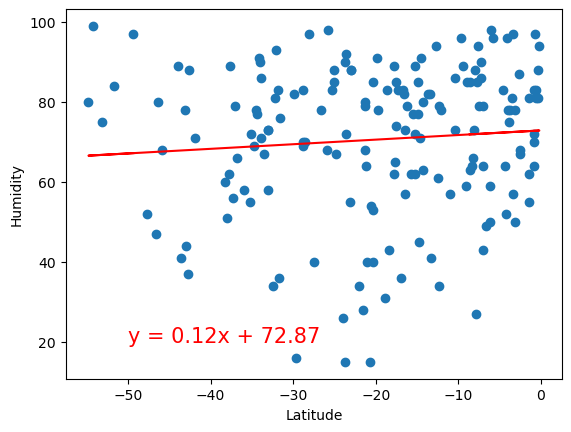

In [38]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:**
-Both the northern and southern hemisphere have slightly positive relationships with latitude and humidity.
-Both plots do not appear to have a strong correlation, and we can see data lots of data points on both sides of the trend line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


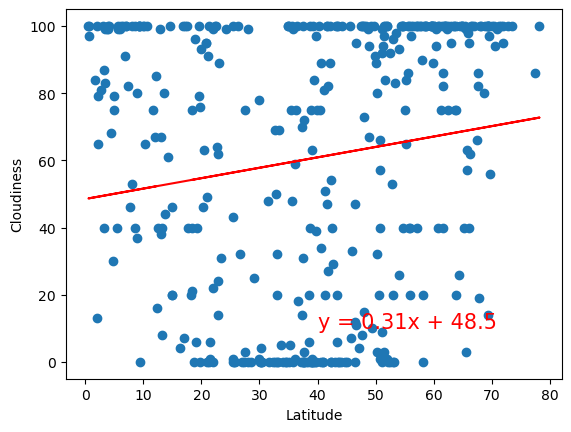

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_data["Lat"]
y = northern_hemi_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.07537342876407405


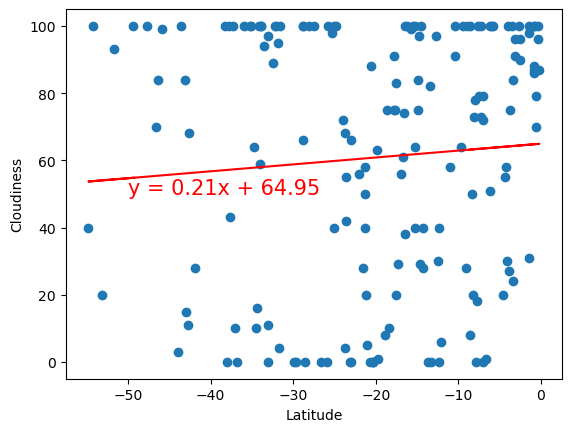

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:**
-These linear relationships remind me of the humidity vs latitude plots because these plots also have a slightly positive trend line as well.
-I will say that the data for cloudiness is more sporadic and spread out, and it does not look like cloudiness and latitude are correlated

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13771297255226042


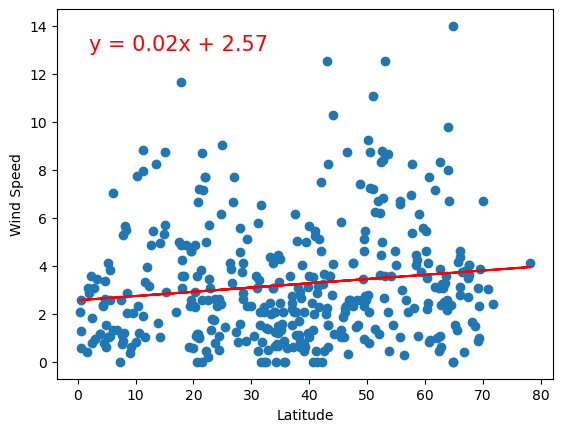

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_data["Lat"]
y = northern_hemi_data["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(2,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.47508740820150275


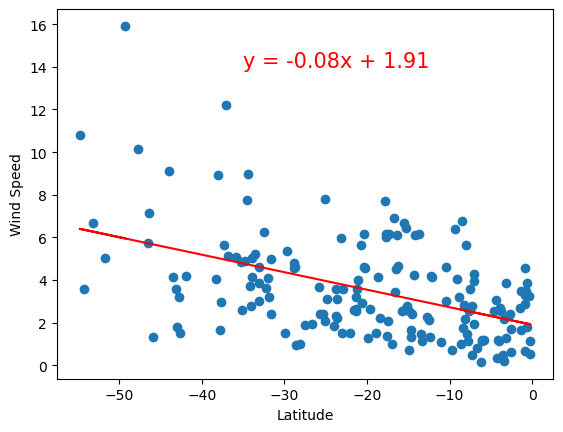

In [43]:
# Southern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# print(line_eq)
print(f"The r-value is: {rvalue}")
plt.scatter(x, y)
plt.plot(x, regress_vals, "-r")
plt.annotate(line_eq,(-35,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:**
-In the southern hemisphere, there is a slightly negative relationship between wind speed and latitude.
-The northern hemisphere has a slightly positive relationship 
-Overall it seems like there is not a correlation between the latitude and wind speed.